In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from mpitree.decision_tree import DecisionTreeRegressor

In [2]:
rng = np.random.RandomState()
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

regr = DecisionTreeRegressor(criterion={"max_depth": 4})
regr.fit(pd.DataFrame(X, columns=["x"]), pd.Series(y))

print(regr)

leaves = []
for n in regr:
    if n.is_leaf:
        leaves.append(n.value)

branches = []
for n in regr:
    if n.branch and n.is_leaf:
        _, b = n.branch.split(" ")
        branches.append(float(b))

print()
print(leaves)
print(branches)

┌── x
│  ├── x [< 3.19]
│  │  └── -0.9327516745294212 [< 0.13]
│  │  ├── x [>= 0.13]
│  │  │  ├── x [< 2.45]
│  │  │  │  └── 0.3306291779444148 [< 0.69]
│  │  │  │  └── 0.8411771620220009 [>= 0.69]
│  │  │  ├── x [>= 2.45]
│  │  │  │  └── -0.7011864044254903 [< 2.51]
│  │  │  │  └── 0.31432724922997013 [>= 2.51]
│  ├── x [>= 3.19]
│  │  ├── x [< 3.74]
│  │  │  ├── x [< 3.63]
│  │  │  │  └── -0.08097147841000024 [< 3.23]
│  │  │  │  └── -0.2763954061097841 [>= 3.23]
│  │  │  └── 0.35479940236591323 [>= 3.63]
│  │  ├── x [>= 3.74]
│  │  │  ├── x [< 4.33]
│  │  │  │  └── -0.6972180380220871 [< 4.30]
│  │  │  │  └── -0.3602391906298548 [>= 4.30]
│  │  │  ├── x [>= 4.33]
│  │  │  │  └── -0.9585322407359589 [< 4.56]
│  │  │  │  └── -1.0623098819103267 [>= 4.56]

[-0.9327516745294212, 0.3306291779444148, 0.8411771620220009, -0.7011864044254903, 0.31432724922997013, -0.08097147841000024, -0.2763954061097841, 0.35479940236591323, -0.6972180380220871, -0.3602391906298548, -0.9585322407359589, -1

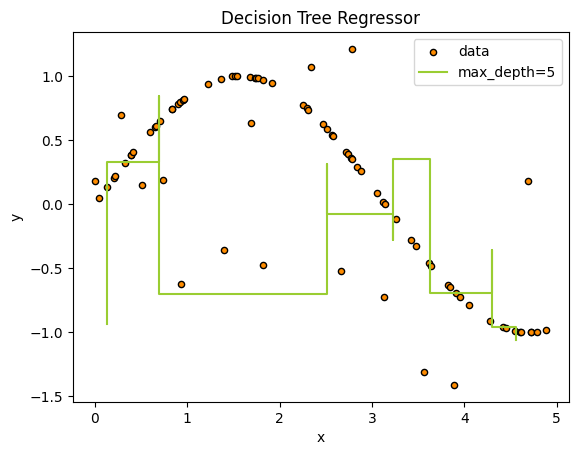

In [3]:
rng = np.random.RandomState()
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

regr = DecisionTreeRegressor(criterion={"max_depth": 5})
regr.fit(pd.DataFrame(X, columns=["x"]), pd.Series(y))

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.step(branches, leaves, where="pre", color="yellowgreen", label="max_depth=5")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Tree Regressor")
plt.legend()
plt.show()